#**Introduction to R in Google Colaboratory**

Previously, you learned how to run Unix commands within Google Colab using `%%bash` headers to bypass the default Python 3 runtime environment. Similarly, in this lab you will learn to run R code in Colab using the `%%R` header.

However, before using `%%R` it must be enabled by running the command below. 

##**Enable R in this notebook by loading the rpy2 extension.**

In [ ]:
%load_ext rpy2.ipython

You can confirm that R has been successfully loaded by calling `version` function.

In [ ]:
%%R
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 


From here, you are now able to install R packages into this Colab notebook.

##**Using packages on Bioconductor**

Bioconductor is a website that hosts many R packages and their related documentation. Documenation is especially important when learning to use an R package for the first time.

###**Follow the link below to access the Bioconductor page for DESeq2.**

https://bioconductor.org/packages/release/bioc/html/DESeq2.html

###**Click the `PDF` button circled in red to access the reference manual for DESeq2.**

Every R package on Bioconductor has a reference manual that was generated from its R code & comments. 

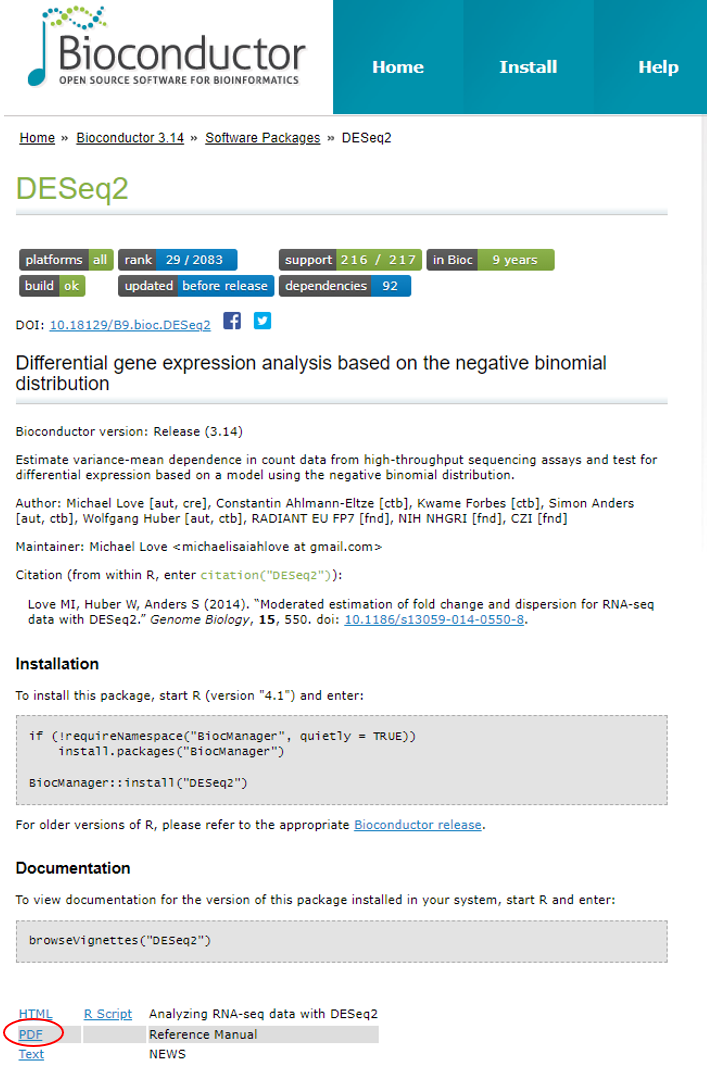

###**Click the `HTML` button, above the previous `PDF` link, circled in red to access the vignettes for DESeq2.**

While not every R package has a vignette, R vignettes provide helpful notebook-like documentation when available. 

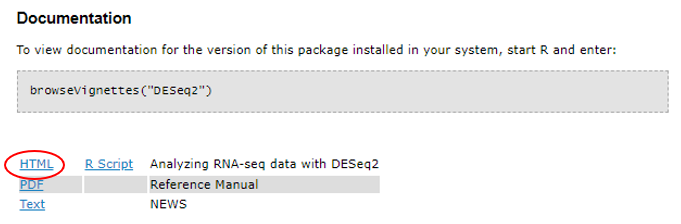

###**Download and install the Bioconductor package manager package.**

Packages on Bioconductor can be downloaded by copying the installation code provided on their webpage. However, this code needs to be modifed to behave well within Google Colab. 


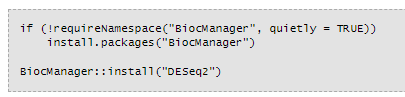

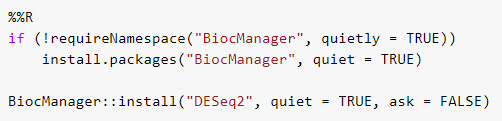


Additionally, notice that unlike Booleans in Python, True and False in R are written with all caps.

##**Using packages not on Bioconductor.**

Packages not on Bioconductor can be installed with the following command. 

###**Get the `genefilter` package hosted on CRAN, the Comprehensive R Archive Network.**

In [ ]:
%%R
install.packages("genefilter",  quiet = TRUE)

###**Get the `EnhancedVolcano` packaged hosted on `kevinblighe`'s GitHub account.**

In [ ]:
%%R
devtools::install_github('hadley/dplyr', quiet = TRUE)

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                                    
2: CRAN packages only                     
3: None                                   
4: rlang (0.4.12 -> f2fbaad50...) [GitHub]
5: glue  (1.6.0  -> 1.6.1       ) [CRAN]  
6: fansi (0.5.0  -> 1.0.2       ) [CRAN]  
7: cli   (3.1.0  -> 3.1.1       ) [CRAN]  

Enter one or more numbers, or an empty line to skip updates: 1


R[write to console]: Installing 3 packages: glue, fansi, cli



Here, an interactive text field appeared, however this does not always occur when installing R packages from GitHub.

##**Additional Resources**

Sometimes, you may want to lookup an R function without knowing what package it comes from. In those cases, the following website can aid your search by extracting official reference manual 

###**Click the following link and lookup the term `install.packages`.**

https://www.rdocumentation.org/

###**Click the following link and lookup the word `genefilter`.**

https://rdrr.io/

#**Lab 8 Assignment: Developing R literacy through use of DESeq2**

##**Instructions**

In a copy of this Colab notebook, use the R fundamentals presented in the previous sections to answer the following questions alongside the below. You will be graded based on how many of the following questions you get correct.

Additionally, keep an eye out for similarities and differences between the R code below and the Python fundamentals you have previously been exposed to. You will find that many of the basic code principles still hold. 

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


###**Download and install the Bioconductor package manager package.**

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

**Question 1.** What will happen if the above code-block is run multiple times? Based on its behavior, how many copies of this code should you have in a Colab notebook?

<font color='red'>Type your answer here.</font> 

###**Download and install the DESeq2 package from Bioconductor.**

This step will around ten to fifteen minutes to complete.

In [ ]:
%%R
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)
library(DESeq2)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'BiocVersion', 'DESeq2'

R[write to console]: also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


R[write to console]: Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'glue', 'jsonlite',
  'Rcpp', 'testthat', 'class', 'foreign', 

**Question 2.** What does the `library()` function from the base R package do? Additionally, post a link to its reference manual documention.

<font color='red'>Type your answer here.</font> 

###**Download RNASeq count data as a file named `gene_matrix.csv`.**

In [ ]:
%%R
countDataLink <- "https://raw.githubusercontent.com/Mangul-Lab-USC/Biomedical_workshop_assignment_part2_datasets/master/Alberttl%40usc.edu/gene_matrix.csv"
download.file(countDataLink, destfile = "gene_matrix.csv", method = "auto", quiet = TRUE)

**Question 3.** What directory in Google Colab does the `gene_matrix.csv` file get downloaded into?

<font color='red'>Type your answer here.</font> 

**Question 4.** What happens if you forget to add either `quiet = TRUE` or `quiet = TRUE, ask = FALSE` as additional arguments to the above three code-blocks?

<font color='red'>Type your answer here.</font> 

###**Save the tabular data in `gene_matrix.csv` in a variable and view its beginning.**

In [ ]:
%%R
countData <- read.csv('gene_matrix.csv', header = TRUE, sep = ",", row.names=NULL)
head(countData)

**Question 5.** If the input file was tab-delimited (.tsv) instead of comma-delimited (.csv), how should the argument/s passed to the `read.csv()` function be written instead?

<font color='red'>Type your answer here.</font> 

###**Download RNASeq sample mapping data as a file named `meta_data.csv`.**

In [ ]:
%%R
metaDataName <- "https://raw.githubusercontent.com/Mangul-Lab-USC/Biomedical_workshop_assignment_part2_datasets/master/Alberttl%40usc.edu/meta_data.csv"
download.file(metaDataName, destfile = "meta_data.csv", method = "auto", quiet = TRUE)

metaData <- read.csv('meta_data.csv', header = TRUE, sep = ",", row.names=NULL)
metaData

**Question 6.** If you can select the first column with `metaData$id`, how would you select the second column labeled `status`?

In [ ]:
%%R
metaData$id

[1] "SAMPLE1" "SAMPLE2" "SAMPLE3" "SAMPLE4" "SAMPLE5" "SAMPLE6" "SAMPLE7"
[8] "SAMPLE8"


<font color='red'>Type your answer here.</font> 

###**Convert the matrix data in `countData` and `metaData` into a DESeqDataSet data structure.**

In [ ]:
%%R
dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~status, tidy = TRUE)
dds

R[write to console]: converting counts to integer mode



class: DESeqDataSet 
dim: 38694 8 
metadata(1): version
assays(1): counts
rownames(38694): ENSG00000000003 ENSG00000000005 ... ENSG00000283120
  ENSG00000283123
rowData names(0):
colnames(8): SAMPLE1 SAMPLE2 ... SAMPLE7 SAMPLE8
colData names(2): id status


**Question 7.** How many genes are stored in the DESeqDataSet `dds`?

<font color='red'>Type your answer here.</font> 

###**Process the DESeqDataSet with DESeq2's core function.**

In [ ]:
%%R
dds <- DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



**Question 8.** How would you preserve the unprocessed DESeqDataSet data structure?

<font color='red'>Type your answer here.</font> 

**Question 9.** What is the default statistical test used by the `DESeq()` function? What else can you change it to?

<font color='red'>Type your answer here.</font> 

###**Extract a results table from the processed DESeqDataSet.**

In [ ]:
%%R
res <- results(dds, tidy=TRUE)
head(res)

**Question 10.** What do each of the column names stand for?

<font color='red'>Type your answer here.</font> 

###**Print out summary statistics for each column of the results table.**

In [ ]:
%%R
summary(res)

###**Download and install the `EnhancedVolcano` package.** 

In [ ]:
%%R
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)
library(EnhancedVolcano)

###**Plot and save a Volcano Plot from the results table.**

In [ ]:
%%R
pdf("volcanoPlot.pdf", width = 9, height = 9)
EnhancedVolcano(res, x = 'log2FoldChange', y = 'pvalue', pCutoff = 10e-6, FCcutoff = 1,  pointSize = 1, title = 'Treatment vs. Control', lab = res$row, labSize = 3.0,  parseLabels = TRUE, drawConnectors = TRUE, widthConnectors = 0.2)

**Question 11.** How many genes have a -log_10 p-value of over 200?

<font color='red'>Type your answer here.</font> 

**Question 12.** What is the name of the column in the results table being used to label the most differentially expressed datapoints?

<font color='red'>Type your answer here.</font> 

**Question 13.** What function can you adjust to change the dimensions of the volcano plot?

<font color='red'>Type your answer here.</font> 

###**Estimate the data's dispersion trend and perform normalization.**

In [ ]:
%%R
dst <- vst(dds, blind=FALSE)
head(assay(dst), 3)

                 SAMPLE1  SAMPLE2  SAMPLE3  SAMPLE4   SAMPLE5  SAMPLE6
ENSG00000000003 9.866887 9.570749 9.954973 9.792314 10.259181 9.984646
ENSG00000000005 6.905919 6.905919 6.905919 6.905919  6.905919 6.905919
ENSG00000000419 9.402469 9.648426 9.537728 9.596341  9.483620 9.611240
                  SAMPLE7  SAMPLE8
ENSG00000000003 10.109799 9.745762
ENSG00000000005  6.905919 6.905919
ENSG00000000419  9.394019 9.562890


**Question 14.** What does the name of the function `vst()` stand for?

<font color='red'>Type your answer here.</font> 

###**Plot a PCA plot from the normalized expression data.**

In [ ]:
%%R
#pdf("PCA.pdf", width = 7, height = 5)
plotPCA(dst, intgroup="status")

**Question 15.** What does the word `status` refer to in this function?

<font color='red'>Type your answer here.</font> 

###**Install additional R packages.**

In [ ]:
%%R
install.packages("genefilter",  quiet = TRUE)
library( "genefilter" )

###**Select the a certain number of genes with the highest variance between samples.** 

In [ ]:
%%R
topVarGenes <- head( order( rowVars( assay(dst) ), decreasing=TRUE ), 25 )

**Question 16.** How would you change the number of genes included in the heatmap generated below?

<font color='red'>Type your answer here.</font> 

###**Install more R packages.**

In [ ]:
%%R
install.packages('gplots',  quiet = TRUE)
library( "gplots" )

install.packages('RColorBrewer',  quiet = TRUE)
library( "RColorBrewer" )

###**Plot an expression-level heatmap with hierarchical clustering of the samples.**

Directly below the tree diagram, the control samples are shown in grey and the treatment samples are shown in green.

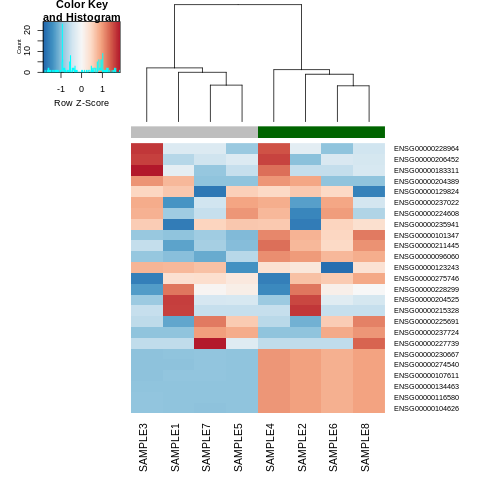

In [ ]:
%%R
#pdf("heatmap.pdf", width = 7, height = 6)
heatmap.2( assay(dst)[ topVarGenes, ], scale="row", 
     trace="none", dendrogram="column", margins = c(7, 10),
     col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255),
     ColSideColors = c( Control="gray", DPN="darkgreen", OHT="orange" )
     [ colData(dst)$status ], )

Notice how the six rows of cells at the bottom correspond to the most sigificantly differentially expressed genes displayed in the volcano plot.

**Question 17.** How would you export the heatmap and PCA plot?

<font color='red'>Type your answer here.</font> 

**Question 18.** What argument would you adjust to prevent clipping of the plot's edges?

<font color='red'>Type your answer here.</font> 